In [22]:
import pandas as pd

files_2024 = [
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\car_data_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\lap_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\position_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\result_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\session_status_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\track_status_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\weather_2024_processed_final.xlsx"
]

files_mexico = [
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\car_data_mexico_grand_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\lap_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\position_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\result_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\session_status_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\track_status_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\weather_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx"
]

def check_file_structure(file_list):
    columns_dict = {}
    
    for file in file_list:
        df = pd.read_excel(file)
        columns_dict[file] = df.columns.tolist()

    return columns_dict

columns_2024 = check_file_structure(files_2024)
columns_mexico = check_file_structure(files_mexico)

def compare_columns(cols_2024, cols_mexico):
    for file_2024, cols_2024_list in cols_2024.items():
        for file_mexico, cols_mexico_list in cols_mexico.items():
            if cols_2024_list == cols_mexico_list:
                print(f"Structurile din {file_2024} și {file_mexico} sunt identice.")
            else:
                print(f"Structurile din {file_2024} și {file_mexico} sunt diferite.")

compare_columns(columns_2024, columns_mexico)


Structurile din C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\car_data_2024_processed_final.xlsx și C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\car_data_mexico_grand_processed_final.xlsx sunt identice.
Structurile din C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\car_data_2024_processed_final.xlsx și C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\lap_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx sunt diferite.
Structurile din C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\car_data_202

In [1]:
import pandas as pd

files_to_concat = [
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\car_data_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\car_data_mexico_grand_processed_final.xlsx"
]

MAX_ROWS_PER_SHEET = 1048576

def concatenate_files(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_excel(file)
        df_list.append(df)
    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

def save_to_multiple_sheets(df, file_path):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        num_sheets = (len(df) // MAX_ROWS_PER_SHEET) + 1
        for i in range(num_sheets):
            start_row = i * MAX_ROWS_PER_SHEET
            end_row = (i + 1) * MAX_ROWS_PER_SHEET
            df_part = df.iloc[start_row:end_row]
            df_part.to_excel(writer, sheet_name=f'Sheet{i+1}', index=False)

car_data_concat = concatenate_files(files_to_concat)

save_to_multiple_sheets(car_data_concat, r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\concatenated_car_data.xlsx")


In [3]:
import pandas as pd

files_to_concat = [
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\position_2024_processed_final.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\position_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx"
]

MAX_ROWS_PER_SHEET = 1048576

def concatenate_files(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_excel(file)
        print(f"Loaded {file} with shape: {df.shape}")  
        df_list.append(df)
    concatenated_df = pd.concat(df_list, ignore_index=True)
    print(f"Concatenated DataFrame shape: {concatenated_df.shape}")  
    return concatenated_df

def save_to_multiple_sheets(df, file_path):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        num_sheets = (len(df) // MAX_ROWS_PER_SHEET) + 1
        for i in range(num_sheets):
            start_row = i * MAX_ROWS_PER_SHEET
            end_row = (i + 1) * MAX_ROWS_PER_SHEET
            df_part = df.iloc[start_row:end_row]
            df_part.to_excel(writer, sheet_name=f'Sheet{i+1}', index=False)

position_data_concat = concatenate_files(files_to_concat)

save_to_multiple_sheets(position_data_concat, r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\concatenated_position_data.xlsx")


Loaded C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\races_2024\position_2024_processed_final.xlsx with shape: (1048575, 10)
Loaded C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\ocean_mexican_gp_data_challenge_datasets\mexican_gp_race_datasets_2018-2019-2021-2022-2023\position_mexico_grand_prix_2018-2019-2021-2022-2023_processed_final.xlsx with shape: (1048575, 10)
Concatenated DataFrame shape: (2097150, 10)


EDA

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

save_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files"

file_paths = {
    "car_data": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_car_data.xlsx",
    "lap_data": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_lap.xlsx",
    "position_data": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_position_data.xlsx",
    "result_data": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_result.xlsx",
    "session_status": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_session_status.xlsx",
    "track_status": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_track_status.xlsx",
    "weather_data": r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_weather.xlsx"
}

data_frames = {name: pd.read_excel(path) for name, path in file_paths.items()}

car_data = data_frames["car_data"]
plt.figure(figsize=(10, 6))
sns.histplot(car_data["Speed"], bins=50, kde=True)
plt.title('Distribution of Car Speeds')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.savefig(f"{save_path}/car_speed_distribution.png")
plt.close()

lap_data = data_frames["lap_data"]
plt.figure(figsize=(10, 6))
sns.histplot(lap_data["LapTime"], bins=50, kde=True)
plt.title('Distribution of Lap Times')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Frequency')
plt.savefig(f"{save_path}/lap_time_distribution.png")
plt.close()

weather_data = data_frames["weather_data"]
plt.figure(figsize=(10, 6))
sns.histplot(weather_data["TrackTemp"], bins=50, kde=True)
plt.title('Distribution of Track Temperatures')
plt.xlabel('Track Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig(f"{save_path}/track_temperature_distribution.png")
plt.close()

track_status = data_frames["track_status"]
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time", y="Status", data=track_status)
plt.title('Track Status Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Track Status')
plt.savefig(f"{save_path}/track_status_over_time.png")
plt.close()

relevant_data = pd.concat([
    lap_data[["LapTime", "Stint"]],
    car_data[["Speed", "RPM", "nGear"]],
    weather_data[["AirTemp", "TrackTemp"]]
], axis=1)

corr_matrix = relevant_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix for Relevant Features')
plt.savefig(f"{save_path}/correlation_matrix.png")
plt.close()

print("All graphs have been generated and saved to the specified folder.")


All graphs have been generated and saved to the specified folder.


Features creation 

In [6]:
import pandas as pd

file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_car_data.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

sheets_with_features = {}

for sheet_name, car_data in sheets.items():
    car_data['AverageSpeed'] = car_data.groupby('DriverName')['Speed'].transform('mean')

    car_data['MaxSpeed'] = car_data.groupby('DriverName')['Speed'].transform('max')

    car_data['AverageRPM'] = car_data.groupby('DriverName')['RPM'].transform('mean')

    car_data['MaxRPM'] = car_data.groupby('DriverName')['RPM'].transform('max')

    sheets_with_features[sheet_name] = car_data

output_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\car_data_with_features.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in sheets_with_features.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Features created for both sheets and saved to car_data_with_features.xlsx")


Features created for both sheets and saved to car_data_with_features.xlsx


In [7]:
import pandas as pd
import numpy as np

lap_data_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_lap.xlsx"
lap_data = pd.read_excel(lap_data_path)

lap_data = lap_data.sort_values(by=['Driver', 'LapNumber'])
lap_data['LapTimeProgression'] = lap_data.groupby('Driver')['LapTime'].pct_change().fillna(0)

lap_data['AvgLapTimePerStint'] = lap_data.groupby(['Driver', 'Stint'])['LapTime'].transform('mean')

lap_data['StintLength'] = lap_data.groupby(['Driver', 'Stint'])['LapNumber'].transform('count')

lap_data['PitStopIndicator'] = ((lap_data['PitOutTime'] > 0) | (lap_data['PitInTime'] > 0)).astype(int)

lap_data['SectorTimeStdDev'] = lap_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].std(axis=1)

lap_data['Compound'] = lap_data['Compound']

lap_data['PositionChange'] = lap_data.groupby('Driver')['Position'].diff().fillna(0)

output_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\lap_data_with_features.xlsx"
lap_data.to_excel(output_path, index=False)

print("Features created and saved successfully.")


Features created and saved successfully.


In [8]:
import pandas as pd

lap_data_with_features_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\lap_data_with_features.xlsx"
lap_data_with_features = pd.read_excel(lap_data_with_features_path)

print(lap_data_with_features.info())

sample_data = lap_data_with_features.sample(10)
print(sample_data)

pit_stop_check = lap_data_with_features[['Driver', 'LapNumber', 'PitOutTime', 'PitInTime', 'PitStopIndicator']].sample(10)
print(pit_stop_check)

lap_time_progression_check = lap_data_with_features[['Driver', 'LapNumber', 'LapTime', 'LapTimeProgression']].sample(10)
print(lap_time_progression_check)

stint_length_check = lap_data_with_features[['Driver', 'Stint', 'LapNumber', 'StintLength']].drop_duplicates().sample(10)
print(stint_length_check)

sector_time_std_check = lap_data_with_features[['Driver', 'LapNumber', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SectorTimeStdDev']].sample(10)
print(sector_time_std_check)

position_change_check = lap_data_with_features[['Driver', 'LapNumber', 'Position', 'PositionChange']].sample(10)
print(position_change_check)

summary_stats = lap_data_with_features.describe()
print(summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660 entries, 0 to 23659
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                23660 non-null  int64         
 1   Time                23660 non-null  float64       
 2   Driver              23660 non-null  object        
 3   DriverNumber        23660 non-null  int64         
 4   LapTime             23660 non-null  float64       
 5   LapNumber           23660 non-null  int64         
 6   Stint               23660 non-null  int64         
 7   PitOutTime          23660 non-null  float64       
 8   PitInTime           23660 non-null  float64       
 9   Sector1Time         23660 non-null  float64       
 10  Sector2Time         23660 non-null  float64       
 11  Sector3Time         23660 non-null  float64       
 12  Sector1SessionTime  23660 non-null  float64       
 13  Sector2SessionTime  23660 non-null  float64   

In [3]:
import pandas as pd

file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_result.xlsx"
result_data = pd.read_excel(file_path)

result_data['PositionChange'] = result_data['GridPosition'] - result_data['Position']


result_data['RaceCompletionStatus'] = result_data['Status'].apply(lambda x: 1 if x == 'Finished' else 0)


result_data['TimeRank'] = result_data['Time'].rank(method='min', ascending=True)


result_data['PointsPerPosition'] = result_data.apply(
    lambda row: row['Points'] / row['Position'] if row['Position'] != 0 else None, axis=1
)

output_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\result_data_with_features.xlsx"
result_data.to_excel(output_path, index=False)

print("Features created and saved successfully.")


Features created and saved successfully.


In [7]:
import pandas as pd

file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_track_status.xlsx"
track_status_data = pd.read_excel(file_path)

track_status_data['StatusChange'] = (track_status_data['Status'] != track_status_data['Status'].shift(1)).astype(int)
track_status_change_count = track_status_data['StatusChange'].sum()

track_status_data['StatusDuration'] = track_status_data['Time'].diff().fillna(0)
average_status_duration = track_status_data.groupby('Status')['StatusDuration'].mean().reset_index()
average_status_duration.columns = ['Status', 'AverageStatusDuration']

total_yellow_flag_time = track_status_data.loc[track_status_data['Status'] == 2, 'StatusDuration'].sum()

clear_time = track_status_data.loc[track_status_data['Status'] == 1, 'StatusDuration'].sum()
track_clear_ratio = clear_time / total_yellow_flag_time if total_yellow_flag_time > 0 else 0

additional_features = pd.DataFrame({
    'TrackStatusChangeCount': [track_status_change_count],
    'TotalYellowFlagTime': [total_yellow_flag_time],
    'TrackClearRatio': [track_clear_ratio]
})

track_status_with_features = pd.concat([track_status_data, additional_features], axis=1)

output_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_track_status_with_features.xlsx"
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    track_status_data.to_excel(writer, sheet_name='OriginalData', index=False)
    track_status_with_features.to_excel(writer, sheet_name='DataWithFeatures', index=False)

print("New file with features saved successfully.")


New file with features saved successfully.


In [10]:
import pandas as pd

file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\concatenated_weather.xlsx"
weather_data = pd.read_excel(file_path)


weather_data['TrackTempShifted'] = weather_data['TrackTemp'].shift(1)
weather_data['HumidityShifted'] = weather_data['Humidity'].shift(1)
weather_data['WindSpeedShifted'] = weather_data['WindSpeed'].shift(1)

weather_data['TrackTempVariability'] = weather_data['TrackTemp'] - weather_data['TrackTempShifted']

weather_data['HumidityVariability'] = weather_data['Humidity'] - weather_data['HumidityShifted']

weather_data['WindSpeedVariability'] = weather_data['WindSpeed'] - weather_data['WindSpeedShifted']

weather_data['CumulativeRainTime'] = weather_data['Rainfall'].cumsum() * (weather_data['Time'].diff().fillna(0))

weather_data['RainProportion'] = weather_data['CumulativeRainTime'] / weather_data['Time']

weather_data.drop(['TrackTempShifted', 'HumidityShifted', 'WindSpeedShifted'], axis=1, inplace=True)

new_file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\merged_files\weather_with_features.xlsx"
weather_data.to_excel(new_file_path, index=False)

print("New features have been successfully added to the dataset.")


New features have been successfully added to the dataset.


1. Exploratory Data Analysis (EDA) and Data Preprocessing


Car Data Summary:
            Year                           Date           RPM         Speed  \
count  1048575.0                        1048575  1.048575e+06  1.048575e+06   
mean      2024.0  2024-03-11 01:23:15.208129792  1.020805e+04  2.125365e+02   
min       2024.0     2024-03-02 15:03:42.390000  0.000000e+00  0.000000e+00   
25%       2024.0     2024-03-02 16:02:11.080000  9.659000e+03  1.580000e+02   
50%       2024.0     2024-03-09 17:30:13.504000  1.071100e+04  2.230000e+02   
75%       2024.0     2024-03-24 04:12:28.692000  1.118600e+04  2.740000e+02   
max       2024.0     2024-03-24 05:25:23.866000  1.305600e+04  3.440000e+02   
std          0.0                            NaN  1.462728e+03  6.987134e+01   

              nGear      Throttle           DRS          Time   SessionTime  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.484577e+00  6.822262e+01  8.274544e-01  2.950596e-02  7.081352e-02   
min    0.000000e+00  0.000000e+00

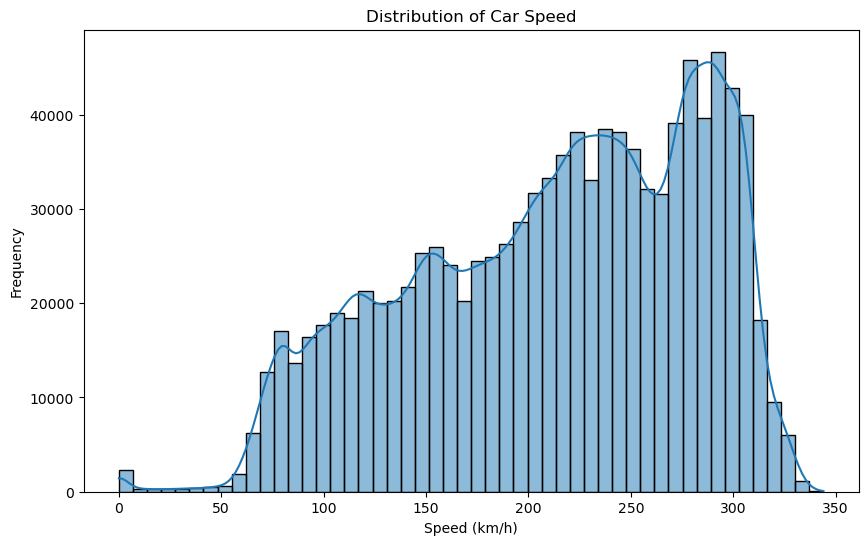

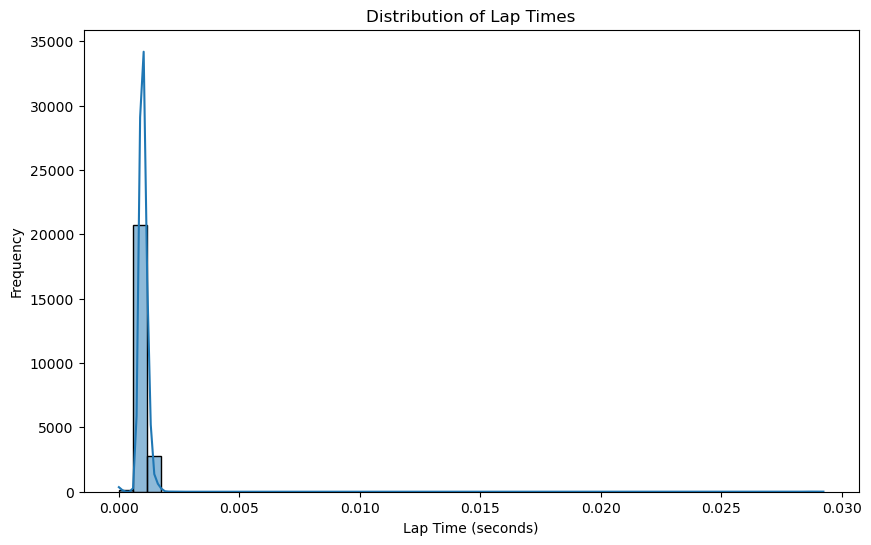

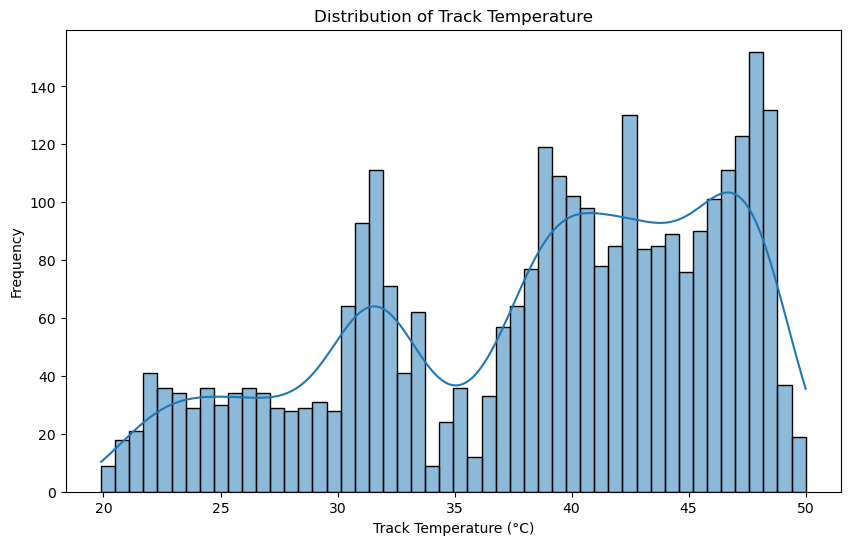

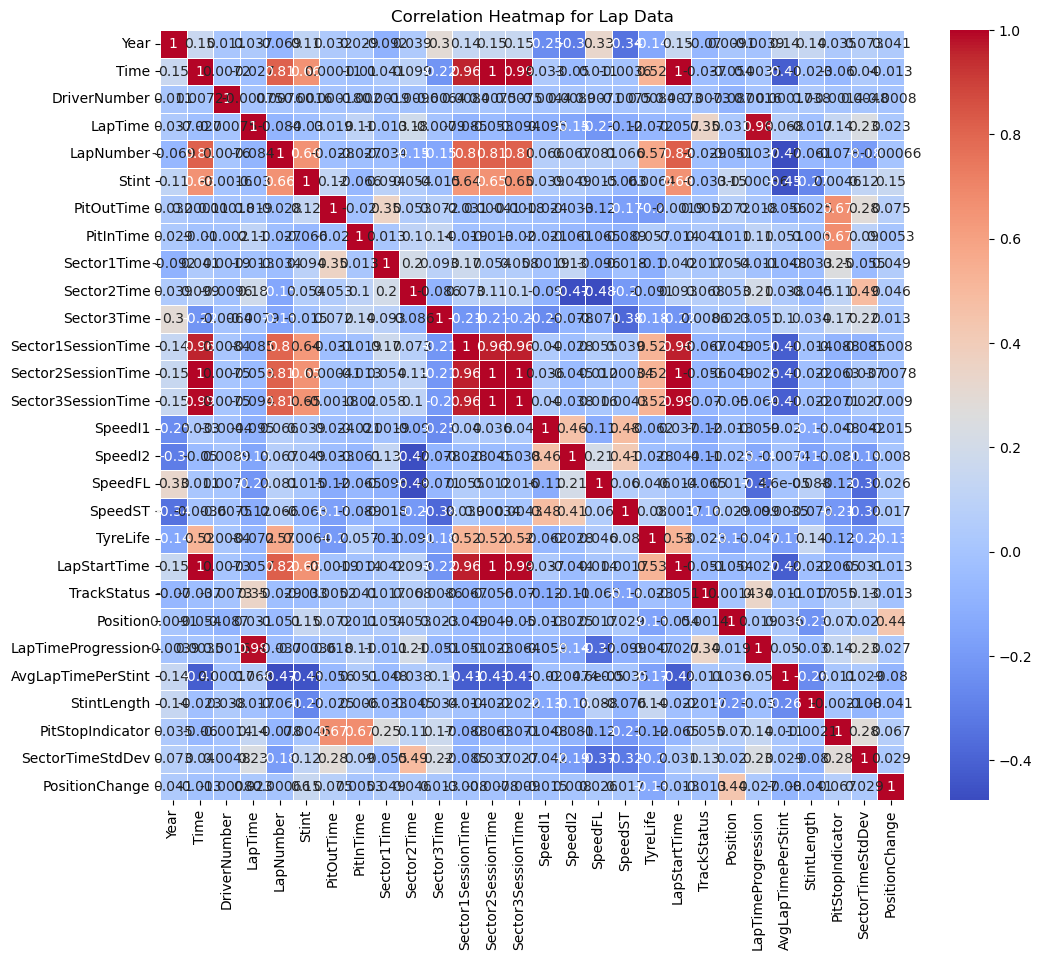

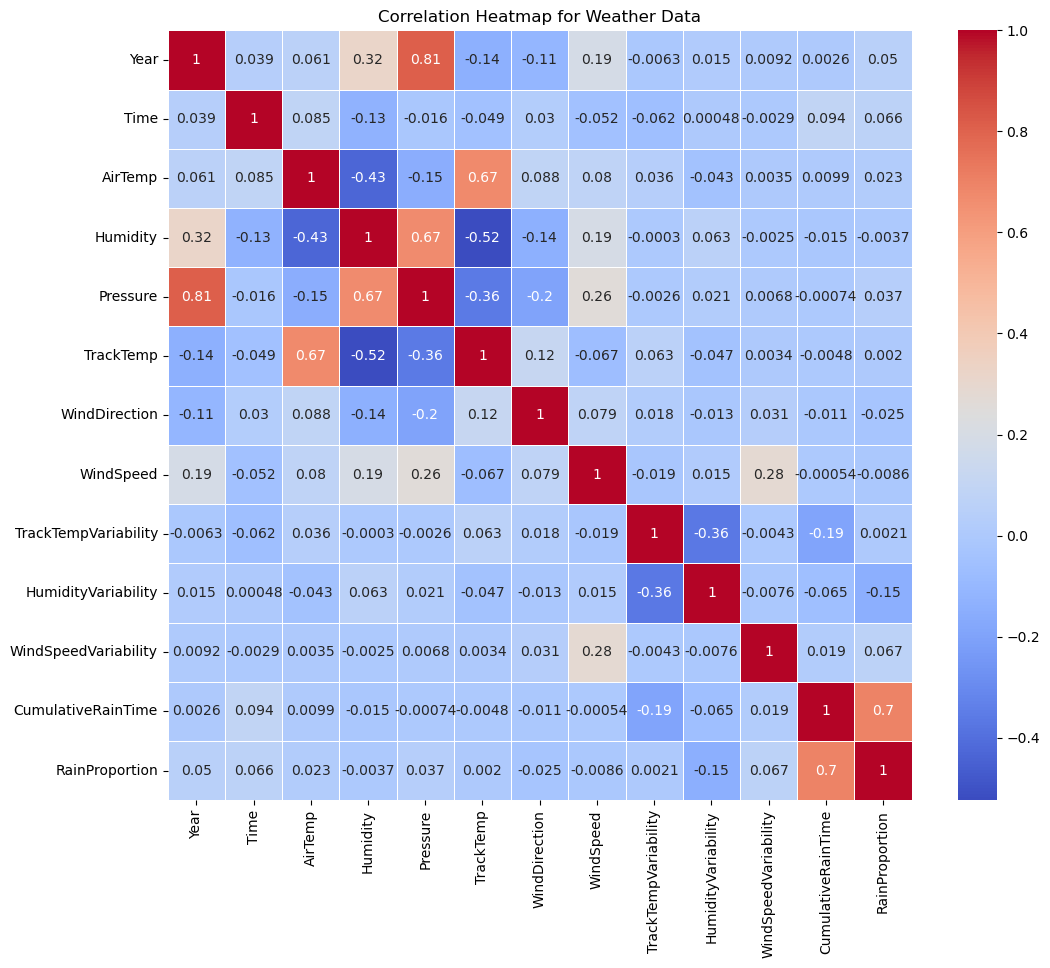

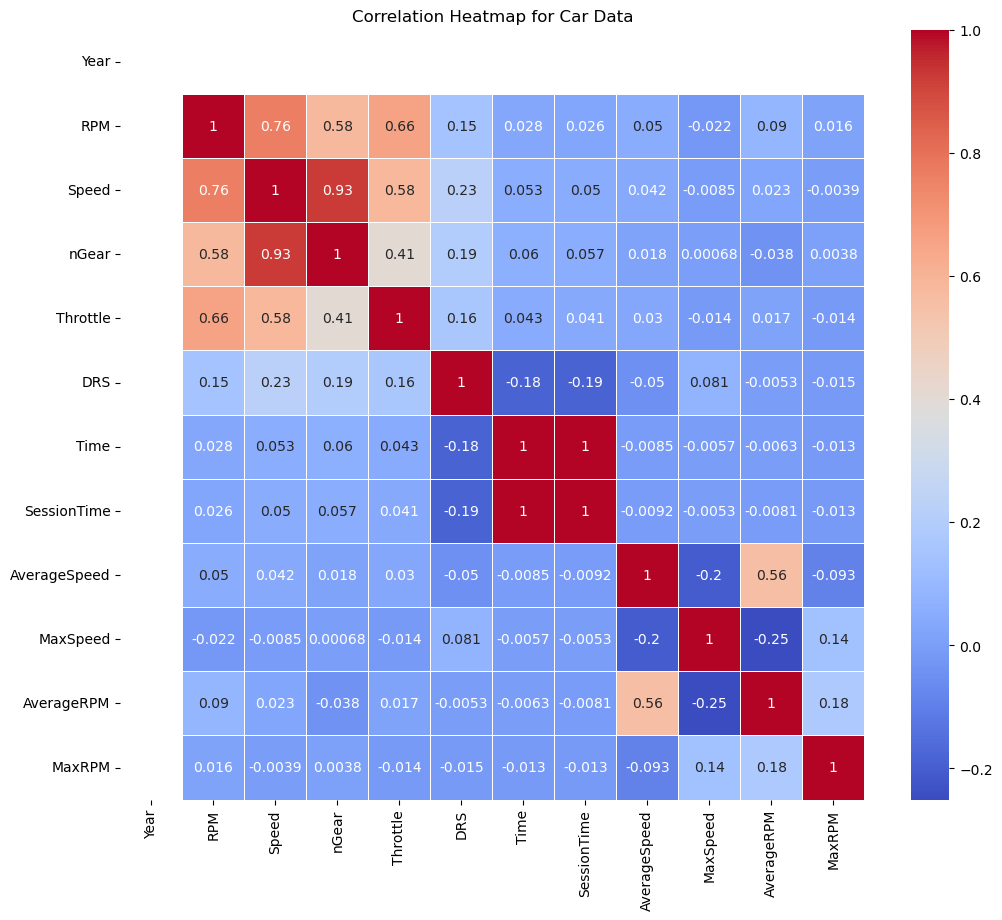

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

car_data_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\car_data_with_features.xlsx"
track_status_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\concatenated_track_status_with_features.xlsx"
lap_data_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_data_with_features.xlsx"
result_data_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\result_data_with_features.xlsx"
weather_data_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\weather_with_features.xlsx"

car_data = pd.read_excel(car_data_path)
track_status_data = pd.read_excel(track_status_path)
lap_data = pd.read_excel(lap_data_path)
result_data = pd.read_excel(result_data_path)
weather_data = pd.read_excel(weather_data_path)

print("Car Data Summary:")
print(car_data.describe())
print("\nTrack Status Data Summary:")
print(track_status_data.describe())
print("\nLap Data Summary:")
print(lap_data.describe())
print("\nResult Data Summary:")
print(result_data.describe())
print("\nWeather Data Summary:")
print(weather_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(car_data['Speed'], bins=50, kde=True)
plt.title('Distribution of Car Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\car_speed_distribution.png')

plt.figure(figsize=(10, 6))
sns.histplot(lap_data['LapTime'], bins=50, kde=True)
plt.title('Distribution of Lap Times')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Frequency')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_time_distribution.png')

plt.figure(figsize=(10, 6))
sns.histplot(weather_data['TrackTemp'], bins=50, kde=True)
plt.title('Distribution of Track Temperature')
plt.xlabel('Track Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\track_temperature_distribution.png')

plt.figure(figsize=(12, 10))
lap_data_numeric = lap_data.select_dtypes(include=['float64', 'int64'])  
corr_matrix = lap_data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Lap Data')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_data_correlation_heatmap.png')

plt.figure(figsize=(12, 10))
weather_data_numeric = weather_data.select_dtypes(include=['float64', 'int64'])  
corr_matrix_weather = weather_data_numeric.corr()
sns.heatmap(corr_matrix_weather, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Weather Data')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\weather_data_correlation_heatmap.png')

plt.figure(figsize=(12, 10))
car_data_numeric = car_data.select_dtypes(include=['float64', 'int64'])  
corr_matrix_car = car_data_numeric.corr()
sns.heatmap(corr_matrix_car, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Car Data')
plt.savefig(r'C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\car_data_correlation_heatmap.png')

plt.show()


In [74]:
import pandas as pd

file_paths = [
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\car_data_with_features.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_data_with_features.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\result_data_with_features.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\track_status_with_features.xlsx",
    r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\weather_with_features.xlsx"
]

for file_path in file_paths:
    df = pd.read_excel(file_path)
    print(f"File: {file_path}")
    print(f"Structure: {df.info()}")
    print("Features:", df.columns.tolist())
    print("\n" + "="*50 + "\n")


File: C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\car_data_with_features.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Year          1048575 non-null  int64         
 1   DriverName    1048575 non-null  object        
 2   Date          1048575 non-null  datetime64[ns]
 3   RPM           1048575 non-null  int64         
 4   Speed         1048575 non-null  int64         
 5   nGear         1048575 non-null  int64         
 6   Throttle      1048575 non-null  int64         
 7   Brake         1048575 non-null  bool          
 8   DRS           1048575 non-null  int64         
 9   Source        1048575 non-null  object        
 10  Time          1048575 non-null  float64       
 11  SessionTime   1048575 non-null  float64       
 12  AverageSpeed  1048575 n

In [3]:
import pandas as pd

lap_data = pd.read_excel("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/lap_data_with_features.xlsx")

car_data = pd.read_excel("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/car_data_with_features.xlsx")

lap_data.rename(columns={'Driver': 'DriverName'}, inplace=True)
car_data['Time'] = car_data['Time'].round(6)
lap_data['Time'] = lap_data['Time'].round(6)
car_features = car_data[['Year', 'DriverName', 'Time' ,'Speed', 'Throttle', 'Brake', 'DRS', 'AverageSpeed', 'MaxSpeed', 'AverageRPM', 'MaxRPM' ]]  # Adjust columns as needed

merged_lap_car_data = pd.merge(
    lap_data,
    car_features,  
    how='left',  
    on=['Year', 'DriverName', 'Time']  
)

merged_lap_car_data.to_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/lap_car_merged_preserve_order.csv", index=False)

print("Merge completed with selected car features. Saved as 'lap_car_merged_preserve_order.csv'.")


Merge completed with selected car features. Saved as 'lap_car_merged_preserve_order.csv'.


In [11]:
import pandas as pd

lap_car_result_data = pd.read_csv(r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_car_merged_preserve_order.csv")

weather_data = pd.read_excel("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/weather_with_features.xlsx")

lap_car_result_data['Time'] = lap_car_result_data['Time'].round(5)
weather_data['Time'] = weather_data['Time'].round(5)

weather_features = weather_data[['Year', 'Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 
                                  'TrackTemp', 'WindDirection', 'WindSpeed', 
                                  'TrackTempVariability', 'HumidityVariability', 
                                  'WindSpeedVariability', 'CumulativeRainTime', 
                                  'RainProportion']]

merged_weather_data = pd.merge(
    lap_car_result_data,
    weather_features,  
    how='left',  
    on=['Year', 'Time']  
)

merged_weather_data.to_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/lap_car_weather_merged.csv", index=False)

print("Merge completed with selected weather features. Saved as 'lap_car_result_weather_merged.csv'.")


Merge completed with selected weather features. Saved as 'lap_car_result_weather_merged.csv'.


In [12]:
import pandas as pd

merged_data = pd.read_csv(r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\lap_car_weather_merged.csv")

print("Structure of the merged dataset:")
print(merged_data.info())

print("\nFirst few rows of the merged dataset:")
print(merged_data.head())

null_values = merged_data.isnull().sum()
print("\nCount of null values in each column:")
print(null_values[null_values > 0])

print("\nDescriptive statistics of numerical features:")
print(merged_data.describe())

print("\nUnique values in categorical features:")
for column in merged_data.select_dtypes(include=['object']).columns:
    print(f"{column}: {merged_data[column].nunique()} unique values")

features_of_interest = [
    'Year', 'DriverNumber', 'LapTime', 'Stint', 'PitOutTime', 'PitInTime', 
    'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedFL', 'Compound', 
    'TyreLife', 'FreshTyre', 'TrackStatus', 'Position', 'AverageSpeed', 
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 
    'WindDirection', 'WindSpeed'
]
print("\nFeatures selected for analysis:")
print(features_of_interest)


Structure of the merged dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25277 entries, 0 to 25276
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  25277 non-null  int64  
 1   Time                  25277 non-null  float64
 2   DriverName            25277 non-null  object 
 3   DriverNumber          25277 non-null  int64  
 4   LapTime               25277 non-null  float64
 5   LapNumber             25277 non-null  int64  
 6   Stint                 25277 non-null  int64  
 7   PitOutTime            25277 non-null  float64
 8   PitInTime             25277 non-null  float64
 9   Sector1Time           25277 non-null  float64
 10  Sector2Time           25277 non-null  float64
 11  Sector3Time           25277 non-null  float64
 12  Sector1SessionTime    25277 non-null  float64
 13  Sector2SessionTime    25277 non-null  float64
 14  Sector3SessionTime    25277 non-null 